<img src='./pic/sharif-main-logo.png' alt="SUT logo" width=300 height=300 align=left class="saturate" > <br>

<div dir=ltr align=center>
<font color=0F5298 size=7>
    Machine Learning <br>
<font color=2565AE size=5>
    Computer Engineering Department <br>
    Fall 2024 <br>
<font color=3C99D size=5>
    Practical Assignment 1 - Supervised Learning <br>
<font color=696880 size=4>
    Erfan Salima, Nikan Vasei, Fatemeh Shiri, Sarina Heshmati

____

# Personal Data

In [140]:
student_number = '401105989'
Name = 'Amirhosein'
Last_Name = 'Rezaei'

# Libraries

In [141]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler, PolynomialFeatures, MinMaxScaler, RobustScaler
from scipy.stats import zscore
from sklearn.impute import SimpleImputer

# Polynomial Regression & Bias-Variance Tradeoff (100 Points)

<font size=4>
Author: Nikan Vasei

## Introduction
In this part, we will explore the **bias-variance tradeoff** using polynomial regression models. Polynomial regression allows us to model complex relationships between an independent variable $X$ and a dependent variable $y$ by introducing higher-degree polynomial terms. However, increasing the complexity of the model can lead to **overfitting** or **underfitting**, which are key concepts in the bias-variance tradeoff.

## Plan
1. **Create a synthetic dataset**: Use the provided quadratic function to generate $X$ and $y$ with noise.
2. **Split the dataset**: Divide the data into training and test sets to evaluate model generalization.
3. **Train polynomial models**: Fit polynomial regression models with degrees ranging from 1 to 10 (or more).
4. **Evaluate performance**: Calculate the MSE for both training and test sets and compare the errors for different polynomial degrees.
5. **Analyze the results**: Use plots to visualize how the error on the training and test sets changes as the model complexity increases.

## Objective
The objective is to determine the degree of the polynomial that best models the relationship between $X$ and $y$ and balances both underfitting and overfitting, i.e., the degree that achieves the best generalization.

## 1. Create a synthetic dataset (15 Points)

Your first task is to define a function that generates a dataset with 1000 samples. The input values for the independent variable $X$ should be randomly selected within the range of **-3 to 3**. To make the dataset more realistic, add noise to the output using a normal distribution with a mean of 0 and a standard deviation of 10.

The relationship between the independent variable $X$ and the dependent variable $y$ is modeled by the following equation:

$$
y = 0.2X^6 - 0.5X^5 + 2X^4 - 5X^3 + 3X^2 - 10X + 5 + \text{noise}
$$

In [142]:
def generate_dataset(range_start, range_end, num_samples=1000, noise_std=10.0):
    X = np.random.uniform(range_start, range_end, num_samples).reshape(num_samples, 1)
    noise = np.random.normal(0, noise_std, num_samples).reshape(num_samples, 1)
    y = (0.2 * X**6) - (0.5 * X**5) + (2 * X**4) - (5 * X**3) + (3 * X**2) - (10 * X) + 5 + noise
    return X, y

Use a scatter plot to visualize the relationship between $X$ and $y$. This will help you understand the structure of the generated data before moving on to fitting models.

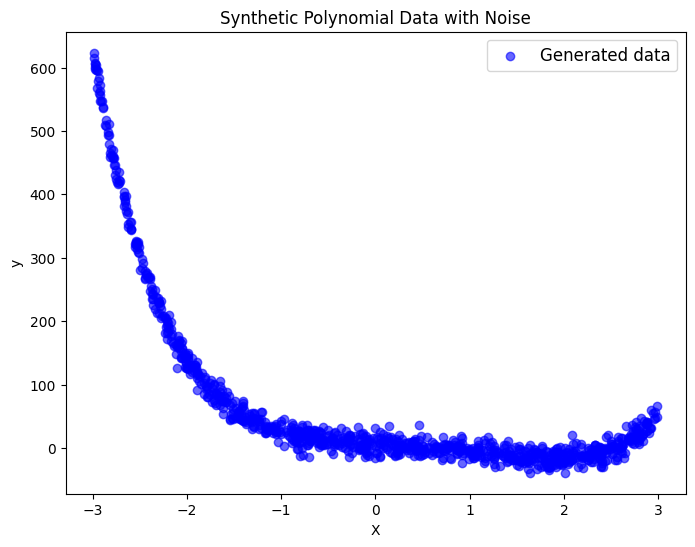

In [143]:
X, y = generate_dataset(-3, 3)
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', alpha=0.6, label='Generated data')
plt.title("Synthetic Polynomial Data with Noise")
plt.xlabel("X")
plt.ylabel("y")
plt.legend(loc='upper right', fontsize=12)
plt.show()

## 2. Splitting the Dataset (5 Points)

In this task, you should split the dataset into three parts:
1. **Training Set**
2. **In-Range Test Set**: This set should contain data within the same range as the training set.
3. **Out-of-Range Test Set**: This set should contain data in the range **[5, 7]**.

Ensure that the two test sets (In-Range and Out-of-Range) have the same length. You can use the `train_test_split` function from the `sklearn` library for convenience in splitting the data.

In [144]:
X_train, X_in_range_test, y_train, y_in_range_test = train_test_split(X, y, test_size=0.4)
X_out_of_range, y_out_of_range = generate_dataset(5, 7, num_samples=len(X_in_range_test))

Again, you can use a scatter plot (or similar plots) to visualize the different sets and see their overall distributions.

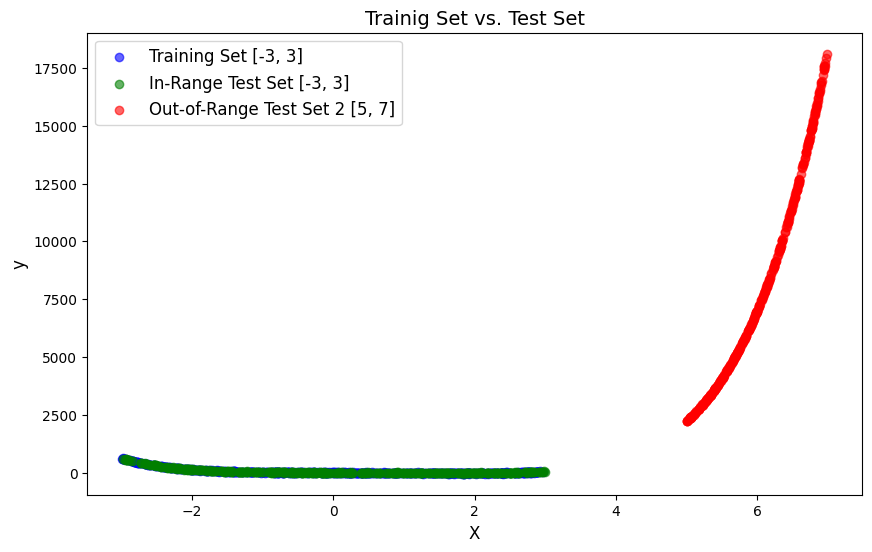

In [145]:
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', alpha=0.6, label='Training Set [-3, 3]')
plt.scatter(X_in_range_test, y_in_range_test, color='green', alpha=0.6, label='In-Range Test Set [-3, 3]')
plt.scatter(X_out_of_range, y_out_of_range, color='red', alpha=0.6, label='Out-of-Range Test Set 2 [5, 7]')
plt.title("Trainig Set vs. Test Set", fontsize=14)
plt.xlabel("X", fontsize=12)
plt.ylabel("y", fontsize=12)
plt.legend(loc='upper left', fontsize=12)
plt.show()

## 3. Polynomial Regression Training (25 Points)

In this task, you should train polynomial regression models with varying degrees, ranging from degree = 2 to degree = 9. You can use the `preprocessing`, `linear_model`, and `pipeline` classes from the `sklearn` library to create and evaluate these models.

In [146]:
def train_models(X, y, degree):
    model = make_pipeline(PolynomialFeatures(degree), StandardScaler(), LinearRegression())
    model.fit(X, y)
    return model

In [147]:
models = {}
degree = 9

for degree in range(2, degree + 1):
  models[degree] = train_models(X_train, y_train, degree)

## 4. Model Evaluation (20 Points)

In this task, you should evaluate the polynomial regression models on both test sets (In-Range Test Set and Out-of-Range Test Set) using Mean Squared Error (MSE). This evaluation will help you understand how well each model generalizes to different data ranges.

For each polynomial degree, compute the MSE on both the in-range test set and the out-of-range test set using the `mean_squared_error` function from the `sklearn` library.

In [148]:
def evaluate_models(models, X_test, y_test):
    losses = {}
    for degree, model in models.items():
        y_pred = model.predict(X_test)
        losses[degree] = mean_squared_error(y_test, y_pred)
    return losses

In [149]:
train_losses = evaluate_models(models, X_train, y_train)
in_range_losses = evaluate_models(models, X_in_range_test, y_in_range_test)
out_of_range_losses = evaluate_models(models, X_out_of_range, y_out_of_range)

## 5. Analyzing Model Scores (20 Points)

In this task, you will visualize and analyze the performance of polynomial regression models by plotting the **logarithm** (to better visualize differences) of losses (Mean Squared Error, MSE) for both training and test set and also by printing the losses related to each degree.

Make sure to train each model a few times to get a sense of variability in the results.

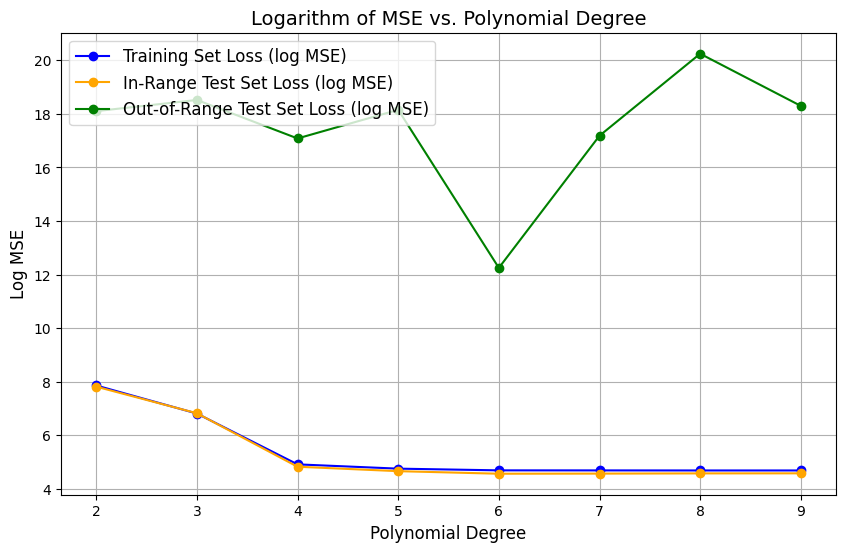

In [150]:
train_log_mse = np.log(list(train_losses.values()))
in_range_log_mse = np.log(list(in_range_losses.values()))
out_of_range_log_mse = np.log(list(out_of_range_losses.values()))

degrees = range(2, 10)
plt.figure(figsize=(10, 6))
plt.plot(degrees, train_log_mse, label="Training Set Loss (log MSE)", marker='o', color='blue')
plt.plot(degrees, in_range_log_mse, label="In-Range Test Set Loss (log MSE)", marker='o', color='orange')
plt.plot(degrees, out_of_range_log_mse, label="Out-of-Range Test Set Loss (log MSE)", marker='o', color='green')
plt.title("Logarithm of MSE vs. Polynomial Degree", fontsize=14)
plt.xlabel("Polynomial Degree", fontsize=12)
plt.ylabel("Log MSE", fontsize=12)
plt.legend(loc='upper left', fontsize=12)
plt.grid(True)
plt.show()

In [151]:
results = pd.DataFrame({
    'Degree': degrees,
    'Training MSE': [train_log_mse[degree-2] for degree in degrees],
    'In-Range Test MSE': [in_range_log_mse[degree-2] for degree in degrees],
    'Out-of-Range Test MSE': [out_of_range_log_mse[degree-2] for degree in degrees],
})

print(results.to_string(index=False, float_format='%.2f'))

 Degree  Training MSE  In-Range Test MSE  Out-of-Range Test MSE
      2          7.86               7.82                  18.10
      3          6.81               6.82                  18.52
      4          4.92               4.83                  17.08
      5          4.76               4.66                  18.15
      6          4.69               4.57                  12.25
      7          4.69               4.57                  17.19
      8          4.69               4.58                  20.25
      9          4.69               4.58                  18.30


## Conclusion (15 Points)

1. Based on your analysis of the training set loss, in-range test set loss, and out-of-range test set loss across different polynomial degrees, summarize what you have learned about the bias-variance tradeoff. How do these losses illustrate the tradeoff between model complexity and performance?

تعادل بایاس-واریانس در این تحلیل به وضوح قابل مشاهده است. مدل‌های با درجه پایین (مثلاً ۲ یا ۳) ممکن است دقت کمی در یادگیری داده‌های آموزشی داشته باشند و این نشان‌دهنده Underfitting است. با افزایش درجه، مدل قادر به یادگیری بیشتر جزئیات می‌شود، اما وقتی درجه به حد بسیار بالایی می‌رسد، مدل در تلاش برای تطابق با داده‌های آموزشی، به سمت Overfitting می‌رود و در نتیجه عملکردش در داده‌های جدید افت می‌کند.

2. Reflecting on the trends observed in the losses as polynomial degree increases, what conclusions can you draw about the effects of model complexity on overfitting and underfitting? How does this understanding help in selecting the appropriate polynomial degree for a model?

در افزایش درجه چندجمله‌ای، می‌توان به نکات زیر اشاره کرد

Underfitting: در درجه‌های پایین، مدل نمی‌تواند الگوهای موجود در داده‌ها را شناسایی کند و خطاهای آموزشی و تست بالا هستند.

Overfitting: با افزایش درجه، مدل بهتر یاد می‌گیرد، اما در یک نقطه خاص، وابستگی بیش از حد به داده‌های آموزشی باعث افزایش خطای تست می‌شود.

# Regularization (50 Points)

<font size=4>
Author: Fatemeh Shiri

# **Introduction**

In this part, you will work with a real dataset that includes information about the cost of treatment of different patients. The cost of treatment depends on many factors: diagnosis, type of clinic, city of residence, age and so on. <a ref= 'https://github.com/stedy/Machine-Learning-with-R-datasets'>Reference</a>

Columns available:

* age: age of primary beneficiary

* sex: insurance contractor gender, female, male

* bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

* children: Number of children covered by health insurance / Number of dependents

* smoker: Smoking

* region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

* charges: Individual medical costs billed by health insurance

# Plan

- First, you will start by fitting a basic regression model using scikit-learn (sklearn) to establish a baseline for comparison. This basic regression model will serve as a reference point for evaluating the performance of more sophisticated models incorporating regularization techniques.

- Furthermore, you will apply L1 (Lasso) and L2 (Ridge) regularization techniques to refine your predictions and evaluate the impact of these methods on the accuracy of your results. Regularization is a technique used to prevent overfitting by adding a penalty term to the loss function, encouraging simpler models with smaller coefficients. L1 regularization (Lasso) encourages sparsity by penalizing the absolute values of coefficients, while L2 regularization (Ridge) penalizes the square of coefficients.

# Load and Explore

Load the dataset (as a dataframe) using pandas and display the top 5 rows of the dataframe

In [152]:
file_path = "./InsuranceData.csv"
insurance_data = pd.read_csv(file_path)

Get a brief description and do some EDA to get familiar with the dataset

In [153]:
print(insurance_data.info())
print(insurance_data.describe())
print(insurance_data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max

# Preprocessing

In [154]:
features = insurance_data.iloc[:, :6].to_numpy()
charges = insurance_data['charges'].to_numpy()
label_encoders = [1, 4, 5]
for i in label_encoders:
    features[:, i] = LabelEncoder().fit_transform(features[:, i])
features = StandardScaler().fit_transform(features)

In [155]:
X_train, X_test, y_train, y_test = train_test_split(features, charges, test_size=0.2)

# Training

Fit a linear regressor to the data.

In [156]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

Get the coefficients of the variables and visualize it

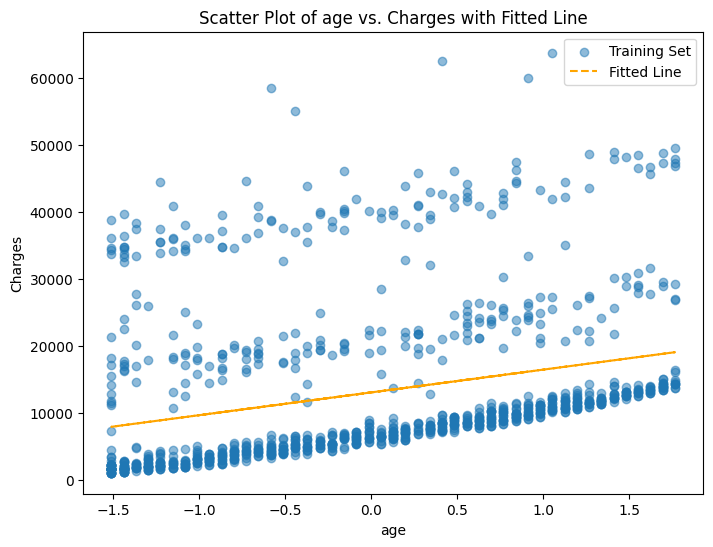

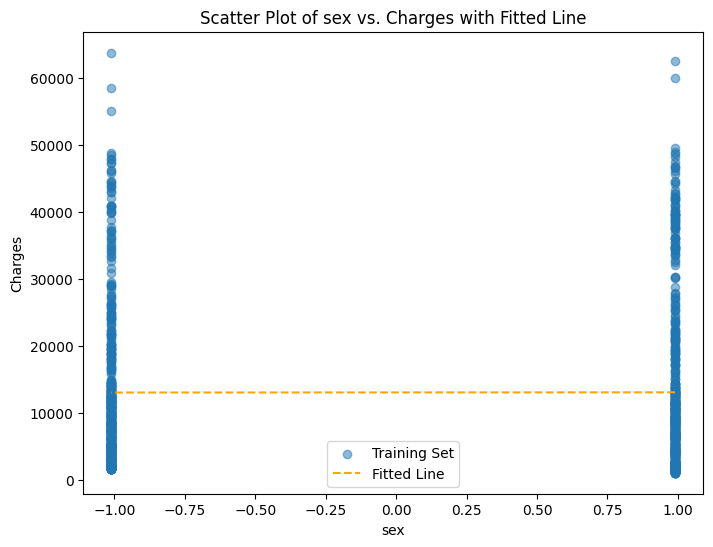

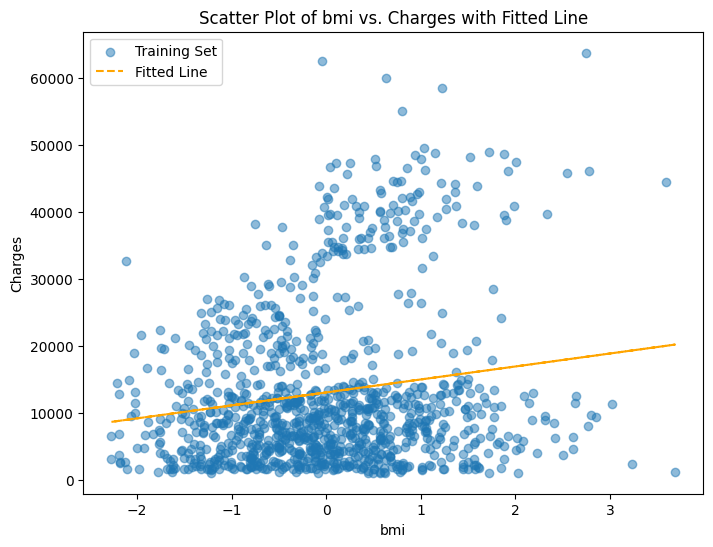

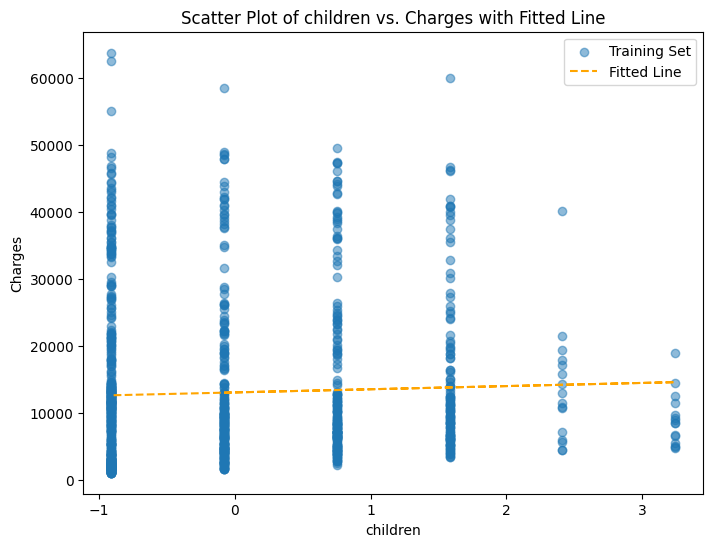

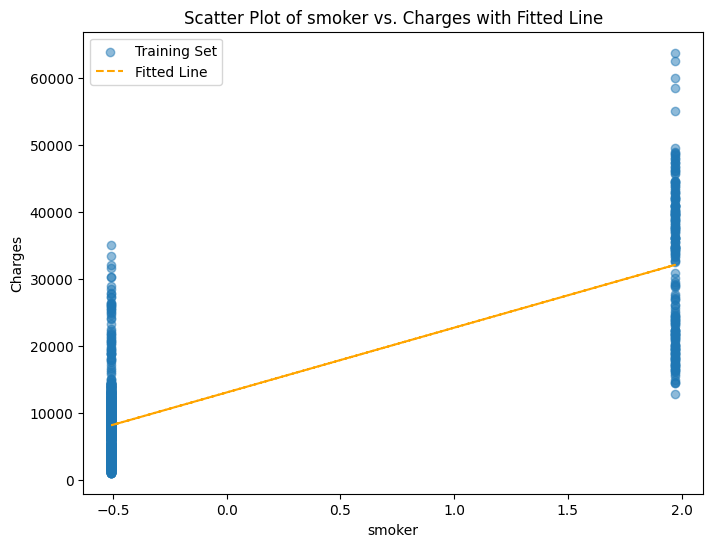

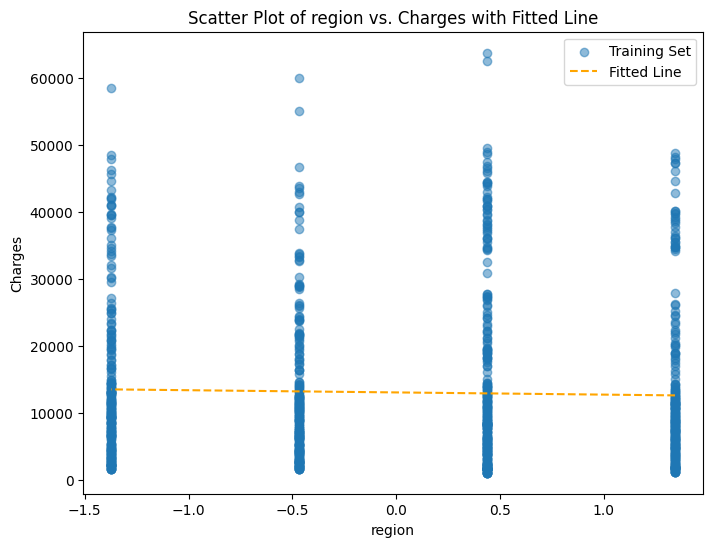

In [157]:
coefficients = reg.coef_
intercept = reg.intercept_

feature_columns = insurance_data.columns[:-1]

for i, column in enumerate(feature_columns):
    plt.figure(figsize=(8, 6))
    plt.scatter(X_train[:, i], y_train, alpha=0.5, label='Training Set')
    fitted_line = intercept + coefficients[i] * X_train[:, i]
    plt.plot(X_train[:, i], fitted_line, linestyle='--', color='orange', label='Fitted Line')
    plt.xlabel(column)
    plt.ylabel('Charges')
    plt.title(f'Scatter Plot of {column} vs. Charges with Fitted Line')
    plt.legend()
    plt.show()

# Regularization

L1 regularization, also known as Lasso (Least Absolute Shrinkage and Selection Operator) regularization, is a technique used in regression models that encourages simplicity and sparsity in the model coefficients. This is achieved by adding a penalty equal to the absolute value of the magnitude of coefficients to the loss function.\
</br>
Train a regression model using L1 regularization.

In [158]:
lasso_regressor = Lasso(alpha=10)
lasso_regressor.fit(X_train, y_train)
lasso_coefficients = lasso_regressor.coef_
print("Lasso Coefficients:", lasso_coefficients)

Lasso Coefficients: [ 3.38897788e+03  6.72786592e+00  1.92459058e+03  4.61799368e+02
  9.64690991e+03 -3.16975223e+02]


L2 regularization, also known as Ridge regularization, is a technique used in regression models to prevent overfitting by adding a penalty equivalent to the square of the magnitude of coefficients to the loss function.
</br>
Train a regression model using L2 regularization.

In [159]:
ridge_regressor = Ridge(alpha=10)
ridge_regressor.fit(X_train, y_train)
ridge_coefficients = ridge_regressor.coef_
print("Ridge Coefficients:", ridge_coefficients)

Ridge Coefficients: [3366.40212342   18.25155412 1919.21022069  470.03018992 9564.43617425
 -324.60671141]


Test different regularization parameters (alpha) for each regularization method using cross validation and visualize the coefficients of the variables. Use MAPE for evaluation.

**Mean Absolute Percentage Error (MAPE)**:


 is a widely used metric for evaluating the accuracy of forecasting models. It quantifies the prediction error as a percentage, providing an intuitive measure of how far off predictions are from actual values. MAPE is defined as the average of the absolute percentage errors between predicted values and actual values. The formula for calculating MAPE is:

$$
\text{MAPE} = \frac{100}{N} \sum_{t=1}^{N} \left| \frac{A_t - F_t}{A_t} \right|
$$
    
Where:
- $N$ is the number of observations,
- $A_t$ is the actual value,
- $F_t$ is the forecasted value.

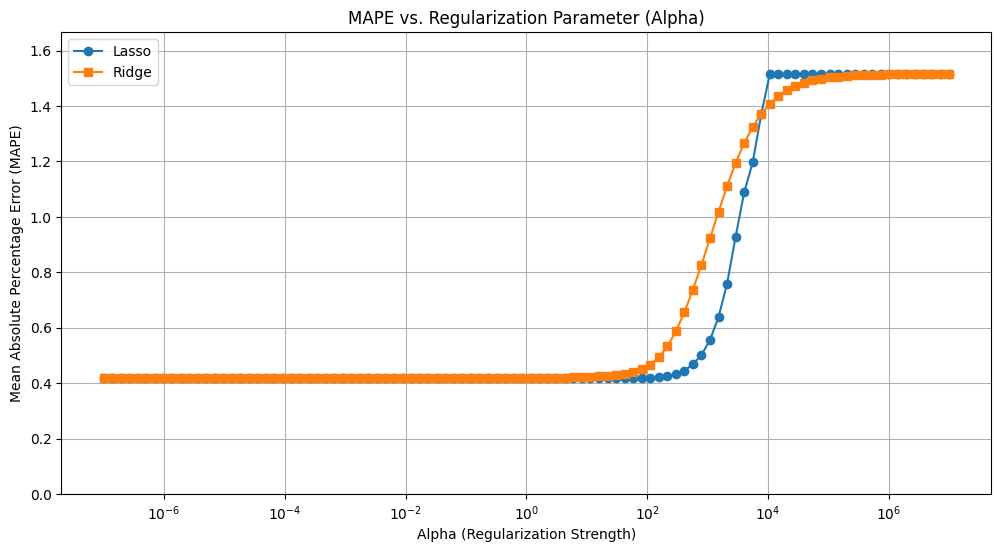

In [160]:
alphas = np.logspace(-7, 7, 100)
losses_lasso = []
losses_ridge = []
kf = KFold(n_splits=12)

for alpha in alphas:
    lasso_model = Lasso(alpha=alpha)
    ridge_model = Ridge(alpha=alpha)
    losses_lasso_sum = 0
    losses_ridge_sum = 0
    for train_index, test_index in kf.split(X_train):
        lasso_model.fit(X_train[train_index], y_train[train_index])
        ridge_model.fit(X_train[train_index], y_train[train_index])
        y_pred_lasso = lasso_model.predict(X_train[test_index])
        y_pred_ridge = ridge_model.predict(X_train[test_index])
        mape_lasso = mean_absolute_percentage_error(y_train[test_index], y_pred_lasso)
        mape_ridge = mean_absolute_percentage_error(y_train[test_index], y_pred_ridge)
        losses_lasso_sum += mape_lasso
        losses_ridge_sum += mape_ridge
    losses_lasso.append(losses_lasso_sum / 12)
    losses_ridge.append(losses_ridge_sum / 12)


plt.figure(figsize=(12, 6))
plt.semilogx(alphas, losses_lasso, label='Lasso', marker='o')
plt.semilogx(alphas, losses_ridge, label='Ridge', marker='s')
plt.title('MAPE vs. Regularization Parameter (Alpha)')
plt.xlabel('Alpha (Regularization Strength)')
plt.ylabel('Mean Absolute Percentage Error (MAPE)')
plt.legend()
plt.grid()
plt.ylim(0, max(max(losses_lasso), max(losses_ridge)) * 1.1)
plt.show()

Add extra variables to dataset to make model more complex, then compare the results.

In [161]:
alphas_lasso = np.logspace(-7, 7, 100)
alphas_ridge = np.logspace(-7, 7, 100)
degrees = range(1, 6)
losses_poly = []
kf = KFold(n_splits=12)

for degree in degrees:
    polynomial_features = PolynomialFeatures(degree=degree)
    poly_reg = LinearRegression()
    losses_tmp = 0
    for train_index, test_index in kf.split(X_train):
        X_train_poly = polynomial_features.fit_transform(X_train[train_index])
        X_test_poly = polynomial_features.transform(X_train[test_index])
        poly_reg.fit(X_train_poly, y_train[train_index])
        y_pred = poly_reg.predict(X_test_poly)
        mape = mean_absolute_percentage_error(y_train[test_index], y_pred)
        losses_tmp += mape
    losses_poly.append(losses_tmp / 12)

print("Polynomial Degrees:", degrees)
print("Polynomial Losses:", losses_poly)


Polynomial Degrees: range(1, 6)
Polynomial Losses: [0.41928714583468846, 0.27766266251660093, 0.2868724727622217, 0.3521062223985261, 0.5199499215688483]


Report your best model with its evaluated results.

In [162]:
best_poly_degree = degrees[np.argmin(losses_poly)]
best_lasso_alpha = alphas_lasso[np.argmin(losses_lasso)]
best_ridge_alpha = alphas_ridge[np.argmin(losses_ridge)]

polynomial_features = PolynomialFeatures(degree=best_poly_degree)
poly_reg = LinearRegression().fit(polynomial_features.fit_transform(X_train), y_train)

lasso_model = Lasso(alpha=best_lasso_alpha).fit(X_train, y_train)
ridge_model = Ridge(alpha=best_ridge_alpha).fit(X_train, y_train)

y_pred_poly = poly_reg.predict(polynomial_features.fit_transform(X_test))
y_pred_lasso = lasso_model.predict(X_test)
y_pred_ridge = ridge_model.predict(X_test)

loss_poly = mean_absolute_percentage_error(y_test, y_pred_poly)
loss_lasso = mean_absolute_percentage_error(y_test, y_pred_lasso)
loss_ridge = mean_absolute_percentage_error(y_test, y_pred_ridge)

print(f'{"Model":<10}{"Best Hyperparameter":<30}{"Loss":<10}')
print(f'{"Lasso":<10}{"alpha = " + str(best_lasso_alpha):<30}{loss_lasso:.4f}')
print(f'{"Ridge":<10}{"alpha = " + str(best_ridge_alpha):<30}{loss_ridge:.4f}')
print(f'{"Polynomial":<10}{"degree = " + str(best_poly_degree):<30}{loss_poly:.4f}')


Model     Best Hyperparameter           Loss      
Lasso     alpha = 58.57020818056673     0.3940
Ridge     alpha = 1e-07                 0.3951
Polynomialdegree = 2                    0.2585


In [163]:
insurance_data_test = pd.read_csv('./InsuranceData_test.csv')
features_test = insurance_data_test.to_numpy()
for i in label_encoders:
    features_test[:, i] = LabelEncoder().fit_transform(features_test[:, i])
features_test = StandardScaler().fit_transform(features_test)

y_pred_lasso = lasso_model.predict(features_test)

insurance_data_test['charges'] = y_pred_lasso
insurance_data_test.to_csv('submission.csv')

print(y_pred_ridge)

[ 5496.07627444 27376.24416738  3868.63395142  2815.03918242
 13910.71010108  5690.3391934  10555.55148275  2726.07444881
 29929.85888618  5111.29160899 36876.24280244 32078.4333047
 10921.40901626 10503.49536053  4897.17754846 28230.95747167
  4309.72974786  7255.35524886  3326.54733674 38317.87707375
 12846.39701503  7621.27526976  9334.10424045 30337.05656813
  8252.94844116 11260.22811896 11996.38880086 37139.55307393
 29317.14394964 13183.57052783  6643.08368465  8994.31153006
 12583.02425614  8752.14344137 12438.11112307 34528.7958742
  2152.92939102 28979.89657107  2394.77562983 13364.533894
  8743.88191781 26777.91455584 10712.46198758  9402.8598542
 13152.79282881  3029.18487942 30768.27509129  5138.85930156
 33149.16193097  8624.58757359 18257.5216199  11136.26908428
  9616.6121606  15295.18445861 11369.1927175   5147.47620229
  4158.92270626  8193.70785116  5144.71428425 37683.47974951
  9026.59238386  8648.74895529  7042.56876436 31103.92394189
  1309.88635896 36423.5559609

## Questions

1. Compare the weight distribution when applying L1/L2 regularization and their sparsity?




اگر هدف ما ایجاد مدلی با ویژگی‌های کم‌تری باشد که بر اساس اهمیت آن‌ها انتخاب شده‌اند، L1 (Lasso) گزینه بهتری است. اما اگر بخواهیم از تمامی ویژگی‌ها استفاده کنیم و تنها آن‌ها را به مقادیر کوچکتر کاهش دهیم، L2 (Ridge) مناسب‌تر خواهد بود. این تفاوت‌ها در توزیع وزن‌ها و درجه پراکندگی آن‌ها، تأثیر زیادی بر عملکرد نهایی مدل و توانایی آن در تعمیم به داده‌های جدید دارد.


2. How does the regularization parameter (alpha) affect each feature? Does it help to model's explainability?

پارامتر منظم‌سازی
𝛼
α نقش مهمی در تعیین وزن ویژگی‌ها در هر دو نوع منظم‌سازی L1 و L2 ایفا می‌کند. در Lasso، یک
𝛼
α بالاتر پراکندگی را ترویج می‌کند و قابلیت توضیح مدل را با برجسته‌کردن ویژگی‌های مهم‌تر بهبود می‌بخشد. در Ridge، در حالی که بر تأثیر ویژگی‌ها کنترل می‌کند بدون اینکه آن‌ها را حذف کند، هنوز هم به مدیریت پیچیدگی و درک رفتار مدل کمک می‌کند. به طور کلی، انتخاب
𝛼
α مناسب به بهبود عملکرد و تفسیرپذیری مدل‌های رگرسیون کمک می‌کند.

3. How does the regularization affect dimension expansion?

منظم‌سازی به ویژه در مدل‌های پیچیده می‌تواند تأثیر قابل توجهی بر گسترش ابعاد داشته باشد. L1 با ایجاد sparsity و حذف ویژگی‌های غیرضروری به کاهش ابعاد کمک می‌کند، در حالی که L2 ابعاد را حفظ می‌کند و می‌تواند به مدیریت پیچیدگی و جلوگیری از بیش‌برازش کمک کند. در نهایت، انتخاب نوع مناسب منظم‌سازی بستگی به هدف مدل و نیاز به تفسیر دارد.






